**keyword extraction using Rake, Yake, Keybert, and Textrank.**

In [ ]:
 # The TFIDF method relies on corpus statistics to weight the extracted keywords, so it cannot be applied here to a single text and this is one of its drawbacks.

In [8]:
tit = "about 5G"
text = '''5G is the 5th generation Mobile network. It is a new global wireless standard after 1G, 2G, 3G, and 4G networks. 5G enables a new kind of network that is designed to connect virtually everyone and everything together including machines, objects, and devices.
5G Wireless technology is meant to deliver higher multi-Gbps peak data speeds, ultra low latency, more reliability, massive network capacity, increased availability, and a more uniform user experience to more users. Higher performance and improved efficiency empower new user experiences and connects new industries.'''

In [9]:
ftxt = tit+" ,"+text
ftxt

'about 5G ,5G is the 5th generation Mobile network. It is a new global wireless standard after 1G, 2G, 3G, and 4G networks. 5G enables a new kind of network that is designed to connect virtually everyone and everything together including machines, objects, and devices.\n5G Wireless technology is meant to deliver higher multi-Gbps peak data speeds, ultra low latency, more reliability, massive network capacity, increased availability, and a more uniform user experience to more users. Higher performance and improved efficiency empower new user experiences and connects new industries.'

YAKE: It is a lightweight, unsupervised automatic keyword extraction method that relies on statistical text features extracted from individual documents to identify the most relevant keywords in the text. 

In [5]:
!pip install yake
import yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.4 MB/s 
     |████████████████████████████████| 132 kB 10.9 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=74000 sha256=ae68c092172817dbafa602e4e4e3bc70aa694b554a3af94a72199d1d6e69f2ef
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [10]:
k_e = yake.KeywordExtractor(top=10, stopwords=None)
keywords = k_e.extract_keywords(ftxt)
keywords

[('generation Mobile network', 0.005167009417630221),
 ('generation Mobile', 0.01104874415841525),
 ('Mobile network', 0.03287585889227125),
 ('Mobile', 0.07447701069209864),
 ('global wireless standard', 0.10509823611395787),
 ('network', 0.14245755595967635),
 ('generation', 0.14672988809092186),
 ('wireless', 0.17416023003216252),
 ('global wireless', 0.18013815619769924),
 ('wireless standard', 0.18013815619769924)]

Rake: Rake is short for Rapid Automatic Keyword Extraction and it is a method of extracting keywords from individual documents. It can also be applied to new fields very easily and is very effective in dealing with multiple types of documents,

In [16]:
!pip install multi_rake
import multi_rake
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(ftxt)
keywords 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[('global wireless standard', 9.0),
 ('ultra low latency', 9.0),
 ('improved efficiency empower', 9.0),
 ('5g wireless technology', 8.5),
 ('uniform user experience', 8.5),
 ('massive network capacity', 8.0),
 ('5g enables', 4.5),
 ('user experiences', 4.5),
 ('4g networks', 4.0),
 ('connect virtually', 4.0),
 ('increased availability', 4.0),
 ('higher performance', 4.0),
 ('network', 2.0),
 ('kind', 1.0),
 ('designed', 1.0),
 ('machines', 1.0),
 ('objects', 1.0),
 ('devices', 1.0),
 ('meant', 1.0),
 ('reliability', 1.0),
 ('users', 1.0),
 ('connects', 1.0),
 ('industries', 1.0)]

**TextRank:**
TextRank is an unsupervised method for extracting keywords and sentences. It is based on a graph where each node is a word, and edges represent relationships between words which are formed by defining the co-occurrence of words within a moving window of a predetermined size. 

In [18]:
!pip install summa
from summa import keywords
TR_keywords = keywords.keywords(ftxt,scores=True)
print(TR_keywords[0:10])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[('new', 0.4279977223955422), ('higher', 0.3706084419239536), ('user', 0.3322531643431659), ('users', 0.3322531643431659), ('speeds ultra low', 0.24504577667997296), ('peak data', 0.2285765511584198)]


*KeyBert
KeyBERT is a simple, easy-to-use keyword extraction algorithm that takes advantage of SBERT embeddings to generate keywords and key phrases from a document that are more similar to the document.

In [20]:
!pip install keybert
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')
keywords = kw_model.extract_keywords(ftxt,keyphrase_ngram_range=(1, 3),  stop_words='english', highlight=False,top_n=10)

keywords_list= list(dict(keywords).keys())

print(keywords_list)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['5g wireless technology', '5g 5th generation', '4g networks 5g', 'networks 5g enables', '5g wireless', '5g enables new', '5g', 'networks 5g', '5g enables', 'devices 5g wireless']


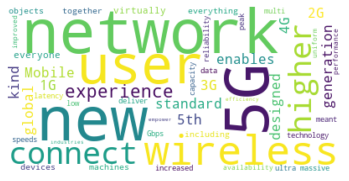

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ftxt)
word_cloud
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()